# Import bibliotek i ładowanie bibliotek

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import plotly.graph_objects as go
from sklearn import feature_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
SEED = 17
data = pd.read_csv('../data/data_eda.csv')
data=data.drop(columns=['Unnamed: 0'])
features=data.columns.tolist()
features.remove('stars')
data

,pages,stars,reviews,series,mix,character,plot,funny,lighthearted,emotional,...,author_stars,Fiction,Nonfiction,Literary,Fantasy,Crime,Social,Children,Romans,Realism
0,273,4.00,2017,0,0.44,0.51,0.02,0.27,0.37,0.91,...,4.305000,1,1,0,0,0,1,0,1,1
1,302,3.78,7330,0,0.39,0.42,0.17,0.03,0.01,0.18,...,3.670000,1,0,0,0,1,0,0,0,0
2,400,4.15,16761,0,0.51,0.39,0.08,0.02,0.01,0.88,...,0.000000,1,0,1,0,0,0,0,0,0
3,459,4.16,2128,1,0.48,0.10,0.40,0.04,0.02,0.07,...,0.000000,1,0,0,1,0,0,0,0,0
4,160,3.65,6634,1,0.28,0.16,0.54,0.92,0.73,0.00,...,4.115000,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6925,432,4.15,30643,0,0.48,0.05,0.46,0.00,0.00,0.40,...,3.856667,1,0,0,1,1,0,0,0,0
6926,352,3.62,1058,0,0.55,0.13,0.30,0.15,0.10,0.25,...,3.700000,1,0,0,1,0,1,0,0,0
6927,535,3.88,30975,1,0.45,0.08,0.45,0.14,0.19,0.31,...,3.870000,1,0,0,1,0,0,1,0,0
6928,472,3.88,5914,1,0.64,0.12,0.22,0.07,0.00,0.36,...,3.660000,1,0,0,1,0,0,1,0,0


$\text{Posiłkując się informacjami z EDA przeprowadzimy Feature Engineering.}$<p>

In [2]:
categorical_features = ['series', 'Fiction', 'Nonfiction', 'Literary', 'Fantasy','Crime', 'Social', 'Children', 'Romans', 'Realism']
target = "stars"
continous_features = data.columns.difference(categorical_features + [target]).tolist()

# Interakcje zmiennych

$\text{Poniżej utworzono interakcje pomiędzy wszystkimi zmiennymi.}$<p>
$\text{Zbiór ten posłuży do wyboru optymalnych zmiennych podczas etapu modelowania.}$

In [3]:
data_interactions = data.copy()
for i in range(len(features)):
    for j in range(i+1, len(features)):
        data_interactions[features[i] + '*' + features[j]] = data_interactions[features[i]] * data_interactions[features[j]]
data_interactions

,pages,stars,reviews,series,mix,character,plot,funny,lighthearted,emotional,...,Crime*Social,Crime*Children,Crime*Romans,Crime*Realism,Social*Children,Social*Romans,Social*Realism,Children*Romans,Children*Realism,Romans*Realism
0,273,4.00,2017,0,0.44,0.51,0.02,0.27,0.37,0.91,...,0,0,0,0,0,1,1,0,0,1
1,302,3.78,7330,0,0.39,0.42,0.17,0.03,0.01,0.18,...,0,0,0,0,0,0,0,0,0,0
2,400,4.15,16761,0,0.51,0.39,0.08,0.02,0.01,0.88,...,0,0,0,0,0,0,0,0,0,0
3,459,4.16,2128,1,0.48,0.10,0.40,0.04,0.02,0.07,...,0,0,0,0,0,0,0,0,0,0
4,160,3.65,6634,1,0.28,0.16,0.54,0.92,0.73,0.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6925,432,4.15,30643,0,0.48,0.05,0.46,0.00,0.00,0.40,...,0,0,0,0,0,0,0,0,0,0
6926,352,3.62,1058,0,0.55,0.13,0.30,0.15,0.10,0.25,...,0,0,0,0,0,0,0,0,0,0
6927,535,3.88,30975,1,0.45,0.08,0.45,0.14,0.19,0.31,...,0,0,0,0,0,0,0,0,0,0
6928,472,3.88,5914,1,0.64,0.12,0.22,0.07,0.00,0.36,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_interactions.to_csv('../data/data_interactions.csv')

# Transformacja zmiennych ciągłych

$\text{Rozpoczniemy od wyznaczenie Mutual Information między zmiennymi niezależnymi a zmienną celu.}$

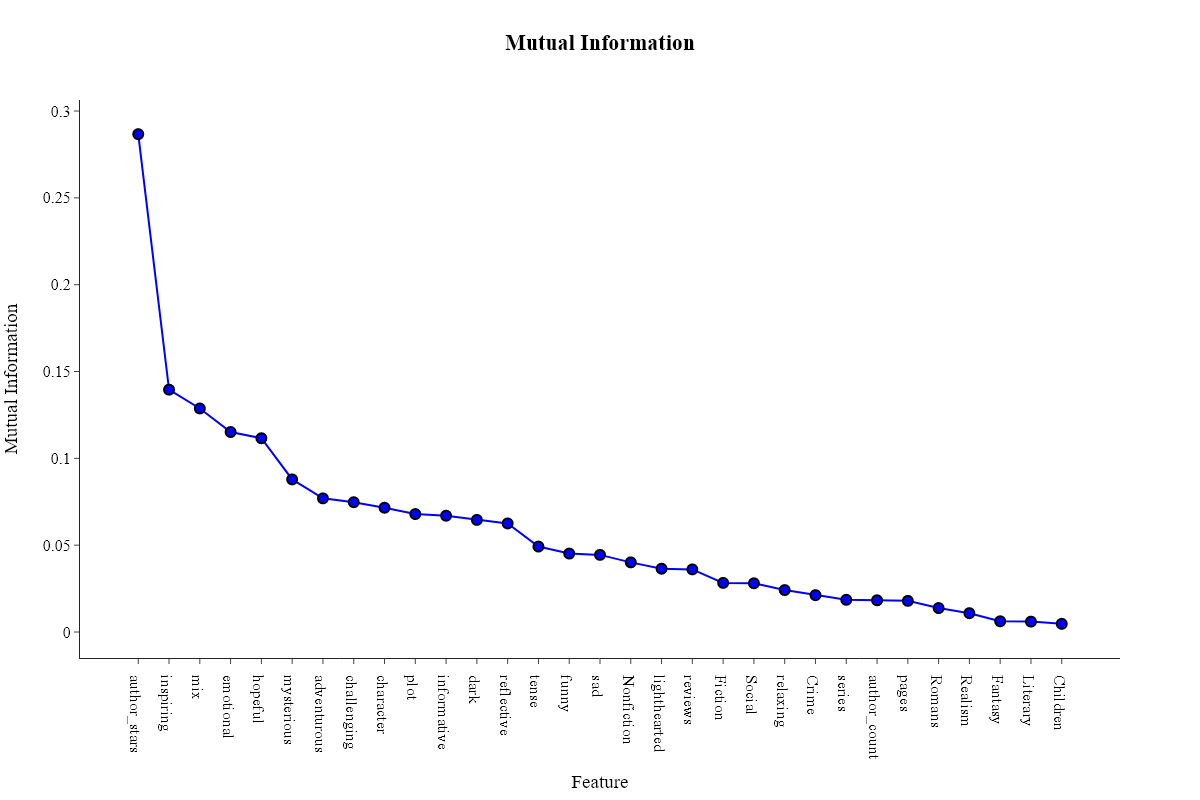

In [5]:
mi_base = {feature: feature_selection.mutual_info_regression(data_interactions[[feature]], data_interactions[target], random_state=SEED)[0] for feature in features}
mi_base = {k: v for k, v in sorted(mi_base.items(), key=lambda item: item[1], reverse=True)}
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(mi_base.keys()), y=list(mi_base.values()), mode='lines+markers', marker=dict(size=10, color="blue", line=dict(width=2, color="black")), line=dict(width=2, color="blue")))
fig.update_layout(template="simple_white", width=1200, height=800, title="<b>Mutual Information<b>", title_x=0.5, xaxis_title="Feature", yaxis_title=f"Mutual Information", font=dict(family="Times New Roman",size=16,color="Black"), showlegend=False)
fig.show("png")

$\text{Najbardziej skorelowaną cechą ze zmienną celu jest zmienna author\_stars.}$<p>
$\text{Ponadto dla każdej zmiennej wartość MI jest większa od 0.}$

$\text{Przechodząc do zmiennych ciągłych widzimy, że zmienne relaxing, reviews oraz pages nadal mało informują o zmiennej objaśniającej.}$<p>
$\text{Znając ich rozkłady z EDA wiemy, że relaxing jest prawostronnie skośny, tak samo jak reviews, a zmienna pages również ma długi prawy ogon.}$<p>
$\text{Dla każdej zmiennej ciągłej dokonamy następujących transformacji:}$<p>
$\qquad\text{1. Transformacja logarytmiczna}$<p>
$\qquad\text{2. Transformacja box-cox}$<p>
$\qquad\text{3. StandardScaler}$<p>
$\qquad\text{4. MinMaxScaler}$<p>
$\qquad\text{5. RobustScaler}$<p>
$\qquad\text{6. QuantileTransformer}$<p>
$\text{Następnie ponownie sprawdzimy poziomy MI oraz porównamy czy wyniki po zastosowaniu wybranych transformacji nie spowdują, że zaobserwujemy wyższe wartości MI.}$

In [6]:
data_log = data.copy()
data_log[continous_features] = np.log1p(data_log[continous_features])
mi_log = {feature: feature_selection.mutual_info_regression(data_log[[feature]], data_log[target], random_state=SEED)[0] for feature in features}
data_boxcox = data.copy()
for feature in continous_features:
    data_boxcox[feature] = stats.boxcox(data_boxcox[feature] + 1)[0]
mi_boxcox = {feature: feature_selection.mutual_info_regression(data_boxcox[[feature]], data_boxcox[target], random_state=SEED)[0] for feature in features}
data_ss = data.copy()
scaler = StandardScaler()
data_ss[continous_features] = scaler.fit_transform(data_ss[continous_features])
mi_ss = {feature: feature_selection.mutual_info_regression(data_ss[[feature]], data_ss[target], random_state=SEED)[0] for feature in features}
data_mm = data.copy()
scaler = MinMaxScaler()
data_mm[continous_features] = scaler.fit_transform(data_mm[continous_features])
mi_mm = {feature: feature_selection.mutual_info_regression(data_mm[[feature]], data_mm[target], random_state=SEED)[0] for feature in features}
data_robust = data.copy()
scaler = RobustScaler()
data_robust[continous_features] = scaler.fit_transform(data_robust[continous_features])
mi_robust = {feature: feature_selection.mutual_info_regression(data_robust[[feature]], data_robust[target], random_state=SEED)[0] for feature in features}
data_quantile = data.copy()
scaler = QuantileTransformer()
data_quantile[continous_features] = scaler.fit_transform(data_quantile[continous_features])
mi_quantile = {feature: feature_selection.mutual_info_regression(data_quantile[[feature]], data_quantile[target], random_state=SEED)[0] for feature in features}

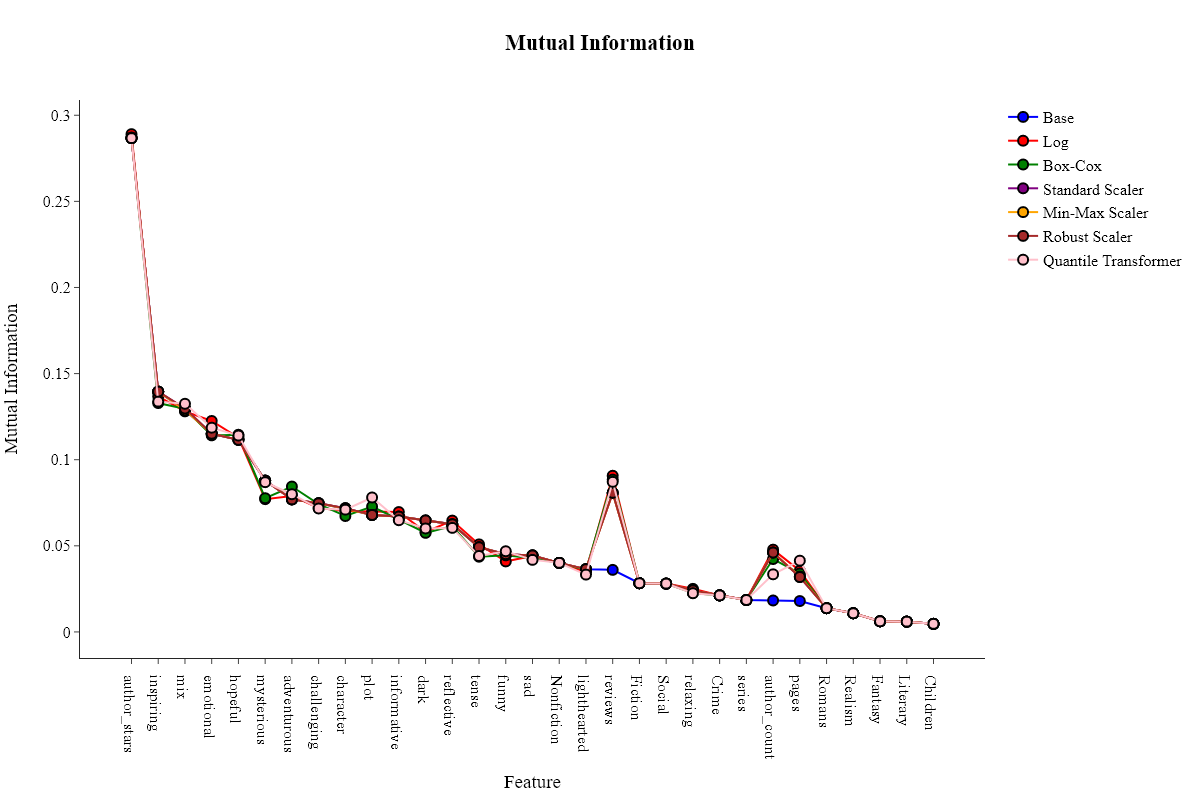

In [7]:
mi = {feature: [mi_base[feature], mi_log[feature], mi_boxcox[feature], mi_ss[feature], mi_mm[feature], mi_robust[feature], mi_quantile[feature]] for feature in features}
mi = {k: v for k, v in sorted(mi.items(), key=lambda item: item[1][0], reverse=True)}
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(mi.keys()), y=[mi[feature][0] for feature in mi.keys()], mode='lines+markers', marker=dict(size=10, color="blue", line=dict(width=2, color="black")), line=dict(width=2, color="blue"), name="Base"))
fig.add_trace(go.Scatter(x=list(mi.keys()), y=[mi[feature][1] for feature in mi.keys()], mode='lines+markers', marker=dict(size=10, color="red", line=dict(width=2, color="black")), line=dict(width=2, color="red"), name="Log"))
fig.add_trace(go.Scatter(x=list(mi.keys()), y=[mi[feature][2] for feature in mi.keys()], mode='lines+markers', marker=dict(size=10, color="green", line=dict(width=2, color="black")), line=dict(width=2, color="green"), name="Box-Cox"))
fig.add_trace(go.Scatter(x=list(mi.keys()), y=[mi[feature][3] for feature in mi.keys()], mode='lines+markers', marker=dict(size=10, color="purple", line=dict(width=2, color="black")), line=dict(width=2, color="purple"), name="Standard Scaler"))
fig.add_trace(go.Scatter(x=list(mi.keys()), y=[mi[feature][4] for feature in mi.keys()], mode='lines+markers', marker=dict(size=10, color="orange", line=dict(width=2, color="black")), line=dict(width=2, color="orange"), name="Min-Max Scaler"))
fig.add_trace(go.Scatter(x=list(mi.keys()), y=[mi[feature][5] for feature in mi.keys()], mode='lines+markers', marker=dict(size=10, color="brown", line=dict(width=2, color="black")), line=dict(width=2, color="brown"), name="Robust Scaler"))
fig.add_trace(go.Scatter(x=list(mi.keys()), y=[mi[feature][6] for feature in mi.keys()], mode='lines+markers', marker=dict(size=10, color="pink", line=dict(width=2, color="black")), line=dict(width=2, color="pink"), name="Quantile Transformer"))
fig.update_layout(template="simple_white", width=1200, height=800, title="<b>Mutual Information<b>", title_x=0.5, xaxis_title="Feature", yaxis_title=f"Mutual Information", font=dict(family="Times New Roman",size=16,color="Black"), showlegend=True)
fig.show("png")

$\text{Różnice w MI są niewielkie dla większości zmiennych.}$<p>
$\text{Największe różnice odnotowano dla zmiennych author\_counts oraz reviews.}$<p>
$\text{Poniżej wybrano tę transformacje, dla której odnotowano najwyższą wartość MI.}$<p>
$\text{Zmienna z tą transformacją zostanie zapisana do zbioru fe (feature engineering).}$

In [8]:
scalers = ["Base", "Log", "Box-Cox", "Standard Scaler", "Min-Max Scaler", "Robust Scaler", "Quantile Transformer"]
best_scaler = {feature: scalers[np.argmax(mi[feature])] for feature in continous_features}
base = [feature for feature in best_scaler if best_scaler[feature] == "Base"]
log = [feature for feature in best_scaler if best_scaler[feature] == "Log"]
boxcox = [feature for feature in best_scaler if best_scaler[feature] == "Box-Cox"]
ss = [feature for feature in best_scaler if best_scaler[feature] == "Standard Scaler"]
mm = [feature for feature in best_scaler if best_scaler[feature] == "Min-Max Scaler"]
robust = [feature for feature in best_scaler if best_scaler[feature] == "Robust Scaler"]
quantile = [feature for feature in best_scaler if best_scaler[feature] == "Quantile Transformer"]
print("Base: {}".format(base))
print("Log: {}".format(log))
print("Box-Cox: {}".format(boxcox))
print("Standard Scaler: {}".format(ss))
print("Min-Max Scaler: {}".format(mm))
print("Robust Scaler: {}".format(robust))
print("Quantile Transformer: {}".format(quantile))

Base: ['challenging', 'lighthearted', 'sad']
Log: ['author_count', 'author_stars', 'emotional', 'informative', 'reflective', 'relaxing', 'reviews', 'tense']
Box-Cox: ['adventurous', 'hopeful']
Standard Scaler: ['character', 'dark', 'inspiring', 'mysterious']
Min-Max Scaler: []
Robust Scaler: []
Quantile Transformer: ['funny', 'mix', 'pages', 'plot']


In [9]:
data_transformations = data.copy()
for feature in log:
    data_transformations[f"{feature}_log"] = np.log1p(data_transformations[feature])
    data_transformations.drop(columns=[feature], inplace=True)
for feature in boxcox:
    data_transformations[f"{feature}_boxcox"] = stats.boxcox(data_transformations[feature] + 1)[0]
    data_transformations.drop(columns=[feature], inplace=True)
for feature in ss:
    data_transformations[f"{feature}_ss"] = StandardScaler().fit_transform(data_transformations[[feature]])
    data_transformations.drop(columns=[feature], inplace=True)
for feature in mm:
    data_transformations[f"{feature}_minmax"] = MinMaxScaler().fit_transform(data_transformations[[feature]])
    data_transformations.drop(columns=[feature], inplace=True)
for feature in robust:
    data_transformations[f"{feature}_robust"] = RobustScaler().fit_transform(data_transformations[[feature]])
    data_transformations.drop(columns=[feature], inplace=True)
for feature in quantile:
    data_transformations[f"{feature}_quantile"] = QuantileTransformer().fit_transform(data_transformations[[feature]])
    data_transformations.drop(columns=[feature], inplace=True)
features_transformations = data_transformations.columns.tolist()
features_transformations.remove('stars')
data_transformations

,stars,series,lighthearted,sad,challenging,Fiction,Nonfiction,Literary,Fantasy,Crime,...,adventurous_boxcox,hopeful_boxcox,character_ss,dark_ss,inspiring_ss,mysterious_ss,funny_quantile,mix_quantile,pages_quantile,plot_quantile
0,4.00,0,0.37,0.12,0.07,1,1,0,0,0,...,0.087261,0.241043,0.719774,-1.087573,1.195063,-0.965521,0.687187,0.576076,0.268268,0.199700
1,3.78,0,0.01,0.05,0.09,1,0,0,0,1,...,0.063533,0.000000,0.380380,1.023268,-0.850443,1.657795,0.280280,0.508008,0.338839,0.648148
2,4.15,0,0.01,0.34,0.18,1,0,1,0,0,...,0.176938,0.193376,0.267249,-0.777155,0.785962,0.444511,0.230230,0.702202,0.712713,0.416917
3,4.16,1,0.02,0.00,0.15,1,0,0,1,0,...,0.380402,0.028212,-0.826353,-0.466738,-0.675114,0.903591,0.320320,0.646146,0.834102,0.916917
4,3.65,1,0.73,0.00,0.00,1,0,0,1,0,...,0.361175,0.028212,-0.600091,-1.056531,-0.792000,-0.834356,0.987988,0.345846,0.074074,0.966967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6925,4.15,0,0.00,0.16,0.34,1,0,0,1,1,...,0.337945,0.068267,-1.014905,0.526599,-0.675114,0.936383,0.000000,0.646146,0.789289,0.943443
6926,3.62,0,0.10,0.04,0.30,1,0,0,1,0,...,0.337945,0.255191,-0.713222,-0.839239,1.195063,-0.768773,0.571071,0.781782,0.541041,0.843343
6927,3.88,1,0.19,0.05,0.05,1,0,0,1,0,...,0.381853,0.163669,-0.901774,-0.404654,0.201532,0.641260,0.555556,0.593093,0.912913,0.938939
6928,3.88,1,0.00,0.22,0.28,1,0,0,1,0,...,0.342141,0.036874,-0.750932,1.582020,-0.850443,0.674051,0.412412,0.931932,0.853854,0.736236


$\text{Następnie utworzymy interakcję wykorzystując zmienne z transformacjami.}$

In [10]:
for i in range(len(features_transformations)):
    for j in range(i+1, len(features_transformations)):
        data_transformations[features_transformations[i] + '*' + features_transformations[j]] = data_transformations[features_transformations[i]] * data_transformations[features_transformations[j]]
data_transformations.to_csv('../data/data_feature_engineering.csv')